In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_egitim,y_egitim),(x_test,y_test)=fashion_mnist.load_data()

In [3]:
x_egitim.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
class_names=['T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

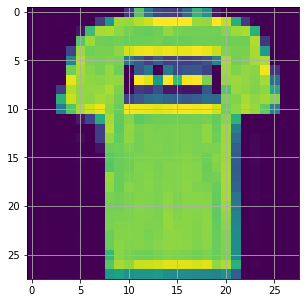

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(x_egitim[1])
plt.grid(True)
plt.show()

In [6]:
x_egitim=x_egitim/255.0
x_test=x_test/255.0

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [8]:
model=Sequential()
model.add(Flatten(input_shape=(28,28),name='Input'))
model.add(Dense(128,activation='leaky_relu',name='Hidden'))
model.add(Dense(10,name='Output'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Flatten)             (None, 784)               0         
                                                                 
 Hidden (Dense)              (None, 128)               100480    
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
hidden=model.layers[1]
print(hidden.name)

Hidden


In [11]:
weights,biases=hidden.get_weights()

In [12]:
print(weights)
print()
print(biases)

[[ 0.06494834 -0.03505185  0.04089532 ...  0.01500294 -0.01889381
   0.00036381]
 [ 0.04646986 -0.04059455  0.05237893 ...  0.03483856  0.03656215
   0.07070338]
 [-0.0622584   0.03562146 -0.01636194 ...  0.00869346  0.01040833
  -0.03867907]
 ...
 [-0.05319021  0.04364882  0.01943733 ... -0.01583805  0.04406754
  -0.04440739]
 [-0.01997435  0.067703    0.06701604 ... -0.04465188  0.04371583
  -0.05427665]
 [ 0.00494689  0.06634723 -0.01825795 ...  0.06614869  0.050938
   0.03672517]]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])
history=model.fit(x_egitim,y_egitim,epochs=10,verbose=1,shuffle=True,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.5140 - acc: 0.8180 - val_loss: 0.4008 - val_acc: 0.8555
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3951 - acc: 0.8579 - val_loss: 0.4000 - val_acc: 0.8583
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3609 - acc: 0.8693 - val_loss: 0.3907 - val_acc: 0.8562
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3364 - acc: 0.8774 - val_loss: 0.3647 - val_acc: 0.8677
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3201 - acc: 0.8836 - val_loss: 0.3645 - val_acc: 0.8693
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3091 - acc: 0.8861 - val_loss: 0.3880 - val_acc: 0.8673
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2957 - acc: 0.8911 - val_loss: 0.3221 - val_acc: 0.8827
Epoch 8/10
1688/1688 [==============================] - 7s 4ms

In [14]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("\nTEST DOGRULUK: ",test_acc)
print()
print("\nTEST LOSS: ",test_loss)
print()

313/313 [==============================] - 1s 3ms/step - loss: 0.3704 - acc: 0.8699

TEST DOGRULUK:  0.8698999881744385


TEST LOSS:  0.3703776001930237



In [15]:
probability_name=tf.keras.Sequential([model,tf.keras.layers.Softmax()])
prediction=probability_name.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [16]:
np.argmax(prediction[10])

4

In [17]:
y_test[10]

4

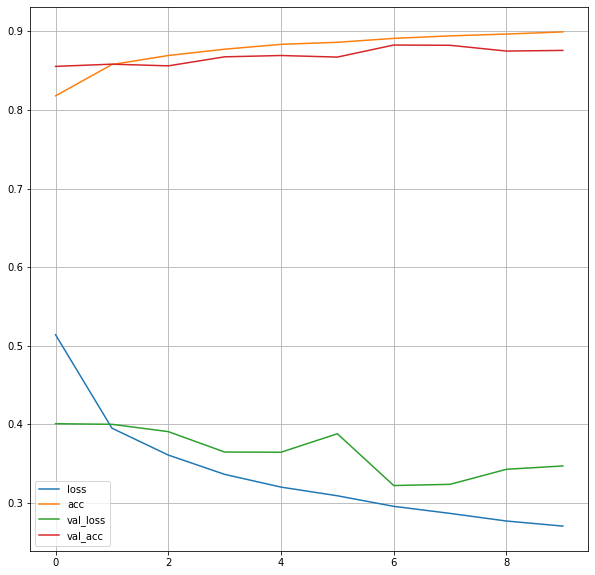

In [20]:
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.show()